In [42]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def E_x(l,d):
    """
    returns E(X) given l likes and d dislikes
    """
    
    def pdf(x):
        """
        underlying pdf for the product,P(X = q) 
        """
        if x > 0.4 and x < 0.6:
            return 5
        else:
            return 0
        
    def e_x(q):
        """
        E(x^l(1-x)^q)
        """
        return q**l*(1 - q)**d * pdf(q)

    def p_x(q):
        return q**(l+1)*(1 - q)**d * pdf(q)
    
    def integration():
        """
        E(X_{l,d}) = int_q q P(x_{l,d} = q) dq
        """
        return integrate.quad(p_x, 0,1)[0] / integrate.quad(e_x,0,1)[0]

    return integration()

In [40]:
def V_static(depth, delta = 0.9, c = 0.45, price = 0.5):
    """
    this function computes an approximation for Rev(price) , 
    based on calculating up to depth product reviews
   """
    if price < c: 
        return 0
    
    table = {}
    for l in range(depth+1):
        d = depth - l
       # print(l,d)
        rev = (price - c)/(1-delta)
        table[(l,d)]=rev
        
    for i in range(depth-1,-1,-1):
        for l in range(i+1):
            d=i-l
            
            exp = E_x(l,d)
            if exp < price:
                table[(l,d)]=0
            else:
                table[(l,d)]= price - c + delta*(exp*table[(l+1,d)]+(1-exp)*table[(l,d+1)])
    
    return table[(0,0)]

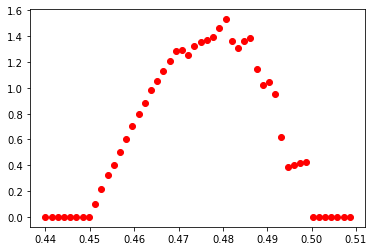

In [62]:
depth = 50
c = 0.45
delta = 0.99
scale= 50
left=0.44
right=0.51

prices = [left + (right-left)*i/scale for i in range(scale)]
X = np.array(prices)
Y = np.array([V_static(depth, delta, c, price) for price in prices])

In [ ]:
plt.plot(X,Y, 'ro')

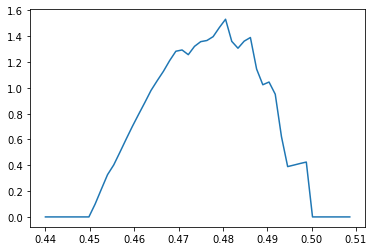

In [63]:
plt.plot(X,Y)